<a href="https://colab.research.google.com/github/ko-syo-noyome/OpenCV-lesson/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from PIL import Image
import os, glob #特定のパターンにマッチするファイルを取得することができる。：かたまり
import numpy as np
from sklearn import model_selection

In [3]:
classes=["image1","image2"]

num_classes=len(classes)
image_size=100 #計算時間短縮で100に変換

#画像の読み込み
X=[]
Y=[]

for index, classlabel in enumerate(classes):
  photos_dir="drive/MyDrive/larning-image/"+classlabel
  #print(photos_dir)
  files=glob.glob(photos_dir+"/*.jpg")
  #print(files)
  
  for i,file in enumerate(files):
    #print(i)
    if i >=200: break
    image=Image.open(file)
    image=image.convert("RGB")
    image=image.resize((image_size,image_size))
    data=np.asarray(image)
    X.append(data)
    Y.append(index)

#tensorflowが読み込みやすいnumpyの配列にする
X=np.array(X)
Y=np.array(Y)





In [4]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y)
xy=(X_train,X_test,y_train,y_test)
np.save("./drive/MyDrive/larning-image/part.npy",xy)


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import numpy as np
import tensorflow
import keras
import datetime




classes=["image1","image2"]
num_classes=len(classes)
image_size=100


# main 関数

def model_train(X,y):
    model=Sequential()
    model.add(Conv2D(32,(3,3),padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                        optimizer=opt,metrics=['accuracy'])


    global history
    history=model.fit(X,y,batch_size=32,epochs=60)

    model.save('./drive/MyDrive/larning-image/part_cn.txt')

    return model


def main():
    X_train,X_test,y_train,y_test=np.load("./drive/MyDrive/larning-image/part.npy",allow_pickle=True)

    print(X_train.shape)
   
    X_train=X_train.astype("float")/256
    X_test=X_test.astype("float")/256

    y_train=np_utils.to_categorical(y_train, num_classes)
    y_test=np_utils.to_categorical(y_test,num_classes)

    model=model_train(X_train,y_train)
    model_eval(model,X_test,y_test)


    return 

def model_eval(model,X,y):
    scores=model.evaluate(X,y,varbose=1)
    print('Test Loss:',scores[0])
    print('Test Accuracy:',scores[1])


if __name__=="__main__":
    main()




(270, 100, 100, 3)
Epoch 1/60
9/9 [==============================] - 20s 2s/step - loss: 0.9797 - accuracy: 0.5037
Epoch 2/60
9/9 [==============================] - 21s 2s/step - loss: 0.7745 - accuracy: 0.4407
Epoch 3/60
9/9 [==============================] - 18s 2s/step - loss: 0.6992 - accuracy: 0.5296
Epoch 4/60
9/9 [==============================] - 17s 2s/step - loss: 0.7045 - accuracy: 0.4778
Epoch 5/60
9/9 [==============================] - 17s 2s/step - loss: 0.6943 - accuracy: 0.5185
Epoch 6/60
9/9 [==============================] - 17s 2s/step - loss: 0.6996 - accuracy: 0.5037
Epoch 7/60
9/9 [==============================] - 17s 2s/step - loss: 0.6638 - accuracy: 0.6259
Epoch 8/60
9/9 [==============================] - 16s 2s/step - loss: 0.6566 - accuracy: 0.6222
Epoch 9/60
9/9 [==============================] - 17s 2s/step - loss: 0.6168 - accuracy: 0.7185
Epoch 10/60
9/9 [==============================] - 17s 2s/step - loss: 0.5517 - accuracy: 0.8000
Epoch 11/60
9/9 [===

TypeError: ignored

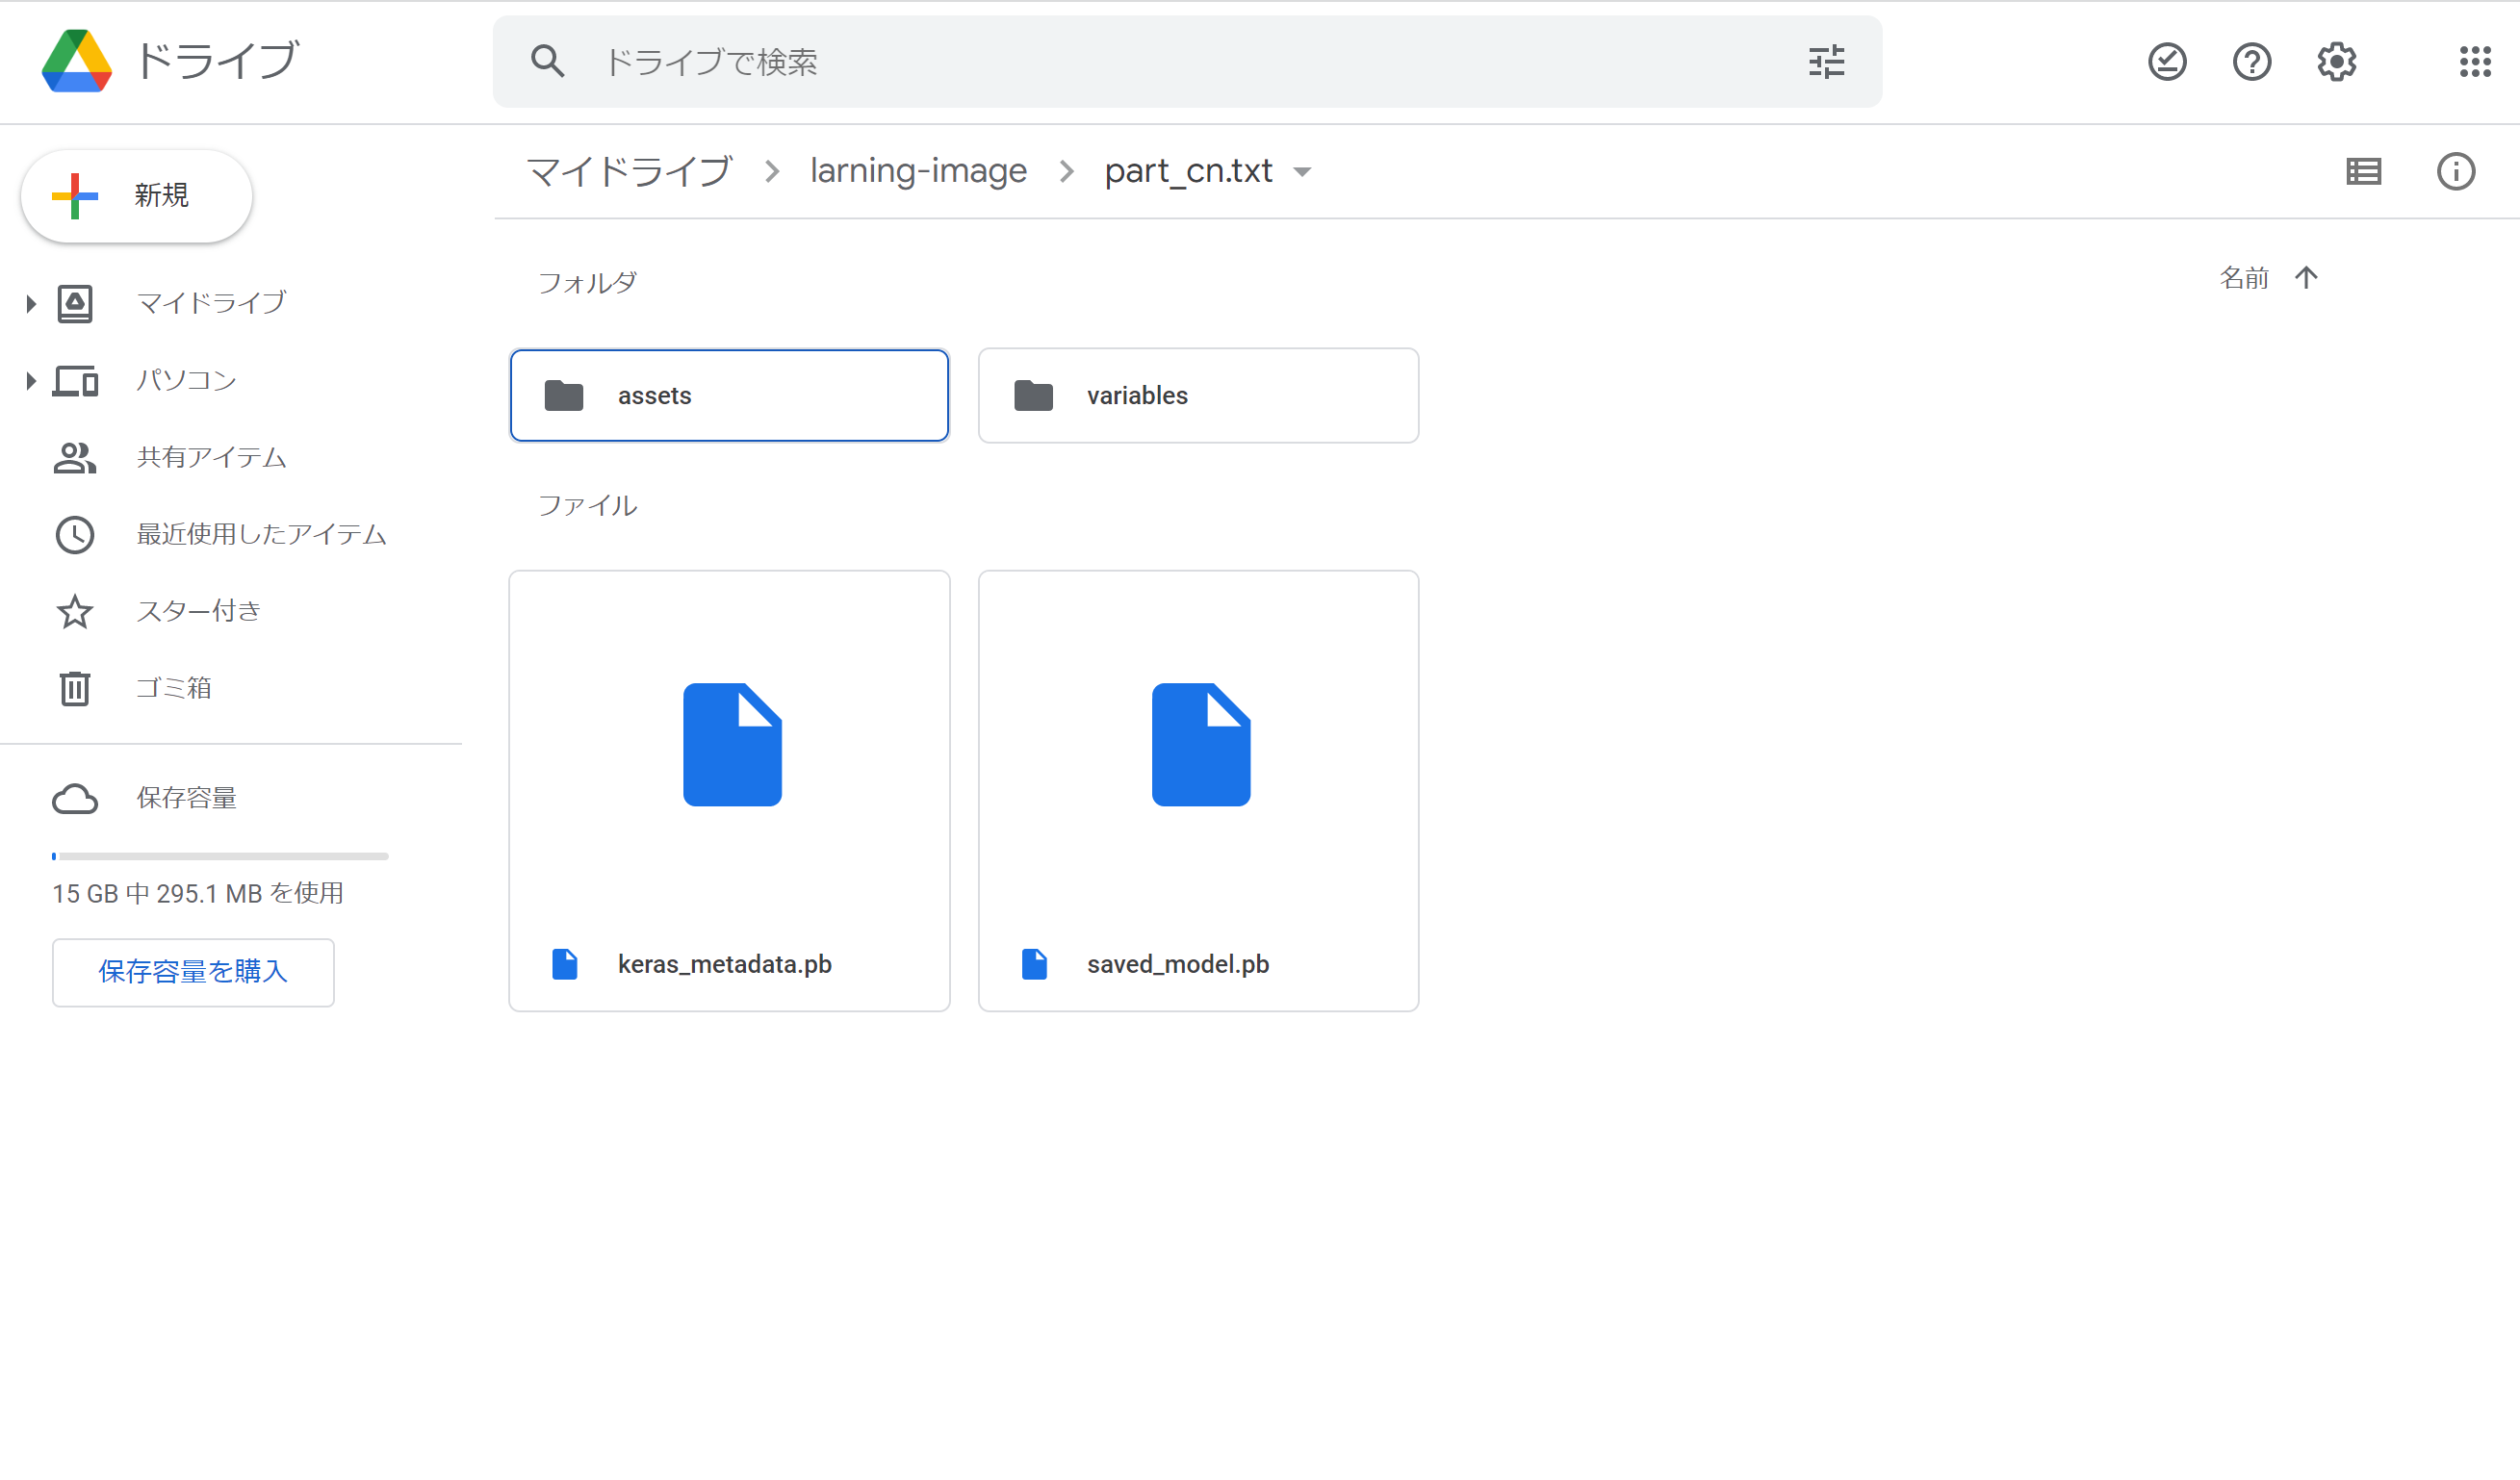

KeyError: ignored

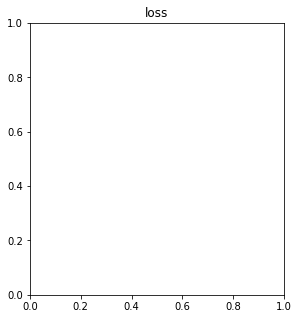

In [8]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示
    
    plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
    plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
    plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示